# Lecture3
# Linear Regression and Logistic Regression

# Linear Regression

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import time

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from examples import utils

In [4]:
DATA_FILE = 'examples/data/birth_life_2010.txt'

In [5]:
# Step 1: read in the data
data, n_samples = utils.read_birth_life_data(DATA_FILE)

In [6]:
# Step 2: create Dataset and iterator
dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))

iterator = dataset.make_initializable_iterator()
X, Y = iterator.get_next()

In [7]:
# Step 3: create weight and bias, initialized to 0
w = tf.get_variable('weights', initializer=tf.constant(0.0))
b = tf.get_variable('bias', initializer=tf.constant(0.0))

In [8]:
# Step 4: build model to predict Y
Y_predicted = X * w + b

In [9]:
# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')
# loss = utils.huber_loss(Y, Y_predicted)

In [10]:
# Step 6: using gradient descent with learning rate of 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [11]:
start = time.time()
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 
    writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
    
    # Step 8: train the model for 100 epochs
    for i in range(100):
        sess.run(iterator.initializer) # initialize the iterator
        total_loss = 0
        try:
            while True:
                _, l = sess.run([optimizer, loss]) 
                total_loss += l
        except tf.errors.OutOfRangeError:
            pass
            
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

    # close the writer when you're done using it
    writer.close() 
    
    # Step 9: output the values of w and b
    w_out, b_out = sess.run([w, b]) 
    print('w: %f, b: %f' %(w_out, b_out))
print('Took: %f seconds' %(time.time() - start))

Epoch 0: 1661.863764550287
Epoch 1: 956.3224439573916
Epoch 2: 844.6737683409139
Epoch 3: 750.7312372197838
Epoch 4: 667.659830722252
Epoch 5: 594.1417484349327
Epoch 6: 529.0787271179651
Epoch 7: 471.5003584364135
Epoch 8: 420.5458252520938
Epoch 9: 375.45531067297253
Epoch 10: 335.55436177954664
Epoch 11: 300.24627770512666
Epoch 12: 269.00374521501146
Epoch 13: 241.3595776562824
Epoch 14: 216.9003910217238
Epoch 15: 195.25972397061292
Epoch 16: 176.1137731664483
Epoch 17: 159.17551683403158
Epoch 18: 144.19069889799545
Epoch 19: 130.93503690609023
Epoch 20: 119.20935661137888
Epoch 21: 108.83793506244884
Epoch 22: 99.66458668207358
Epoch 23: 91.55171666162971
Epoch 24: 84.37658985632197
Epoch 25: 78.03213362396008
Epoch 26: 72.42178616552172
Epoch 27: 67.46132107331957
Epoch 28: 63.07563027821873
Epoch 29: 59.19871881428714
Epoch 30: 55.77163058824279
Epoch 31: 52.742706123048954
Epoch 32: 50.06563247971506
Epoch 33: 47.70006537150391
Epoch 34: 45.61017402416389
Epoch 35: 43.7637948

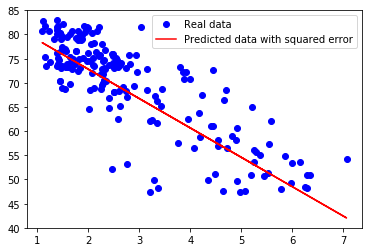

In [12]:
# plot the results
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data with squared error')
# plt.plot(data[:,0], data[:,0] * (-5.883589) + 85.124306, 'g', label='Predicted data with Huber loss')
plt.legend()
plt.show()

# simpler linear regression model with placeholders

In [13]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import time

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from examples import utils

In [14]:
DATA_FILE = 'examples/data/birth_life_2010.txt'

In [15]:
# Step 1: read in data from the .txt file
data, n_samples = utils.read_birth_life_data(DATA_FILE)

In [16]:
# Step 2: create placeholders for X (birth rate) and Y (life expectancy)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

In [18]:
# Step 3: create weight and bias, initialized to 0
w2 = tf.get_variable('weights2', initializer=tf.constant(0.0))
b2 = tf.get_variable('bias2', initializer=tf.constant(0.0))

In [19]:
# Step 4: build model to predict Y
Y_predicted = w2 * X + b2 

In [20]:
# Step 5: use the squared error as the loss function
# you can use either mean squared error or Huber loss
loss = tf.square(Y - Y_predicted, name='loss')
# loss = utils.huber_loss(Y, Y_predicted)

In [21]:
# Step 6: using gradient descent with learning rate of 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [22]:
start = time.time()
writer = tf.summary.FileWriter('./graphs/linear_reg', tf.get_default_graph())
with tf.Session() as sess:
	# Step 7: initialize the necessary variables, in this case, w and b
	sess.run(tf.global_variables_initializer()) 
	
	# Step 8: train the model for 100 epochs
	for i in range(100): 
		total_loss = 0
		for x, y in data:
			# Session execute optimizer and fetch values of loss
			_, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
			total_loss += l
		print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

	# close the writer when you're done using it
	writer.close() 
	
	# Step 9: output the values of w and b
	w_out, b_out = sess.run([w2, b2]) 

print('Took: %f seconds' %(time.time() - start))

Epoch 0: 1661.863764550287
Epoch 1: 956.3224439573916
Epoch 2: 844.6737683409139
Epoch 3: 750.7312372197838
Epoch 4: 667.659830722252
Epoch 5: 594.1417484349327
Epoch 6: 529.0787271179651
Epoch 7: 471.5003584364135
Epoch 8: 420.5458252520938
Epoch 9: 375.45531067297253
Epoch 10: 335.55436177954664
Epoch 11: 300.24627770512666
Epoch 12: 269.00374521501146
Epoch 13: 241.3595776562824
Epoch 14: 216.9003910217238
Epoch 15: 195.25972397061292
Epoch 16: 176.1137731664483
Epoch 17: 159.17551683403158
Epoch 18: 144.19069889799545
Epoch 19: 130.93503690609023
Epoch 20: 119.20935661137888
Epoch 21: 108.83793506244884
Epoch 22: 99.66458668207358
Epoch 23: 91.55171666162971
Epoch 24: 84.37658985632197
Epoch 25: 78.03213362396008
Epoch 26: 72.42178616552172
Epoch 27: 67.46132107331957
Epoch 28: 63.07563027821873
Epoch 29: 59.19871881428714
Epoch 30: 55.77163058824279
Epoch 31: 52.742706123048954
Epoch 32: 50.06563247971506
Epoch 33: 47.70006537150391
Epoch 34: 45.61017402416389
Epoch 35: 43.7637948

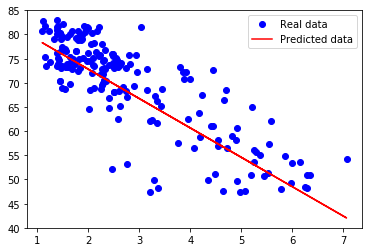

In [23]:
# plot the results
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data')
plt.legend()
plt.show()

# logistic regression

In [24]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import tensorflow as tf
import time

from examples import utils

In [25]:
# Define paramaters for the model
learning_rate = 0.01
batch_size = 128
n_epochs = 30
n_train = 60000
n_test = 10000

In [44]:
# Step 1: Read in data
mnist_folder = 'examples/data/mnist'
utils.download_mnist(mnist_folder)
train, val, test = utils.read_mnist(mnist_folder, flatten=True)

Successfully downloaded examples/data/mnist/train-images-idx3-ubyte.gz
Successfully downloaded examples/data/mnist/train-labels-idx1-ubyte.gz
Successfully downloaded examples/data/mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded examples/data/mnist/t10k-labels-idx1-ubyte.gz


In [45]:
# Step 2: Create datasets and iterator
train_data = tf.data.Dataset.from_tensor_slices(train)
train_data = train_data.shuffle(10000) # if you want to shuffle your data
train_data = train_data.batch(batch_size)

test_data = tf.data.Dataset.from_tensor_slices(test)
test_data = test_data.batch(batch_size)

iterator = tf.data.Iterator.from_structure(train_data.output_types, 
                                           train_data.output_shapes)
img, label = iterator.get_next()

train_init = iterator.make_initializer(train_data)	# initializer for train_data
test_init = iterator.make_initializer(test_data)	# initializer for train_data

In [29]:
# Step 3: create weights and bias
# w is initialized to random variables with mean of 0, stddev of 0.01
# b is initialized to 0
# shape of w depends on the dimension of X and Y so that Y = tf.matmul(X, w)
# shape of b depends on Y
w3 = tf.get_variable(name='weights3', shape=(784, 10), initializer=tf.random_normal_initializer(0, 0.01))
b3 = tf.get_variable(name='bias3', shape=(1, 10), initializer=tf.zeros_initializer())

In [46]:
# Step 4: build model
# the model that returns the logits.
# this logits will be later passed through softmax layer
logits = tf.matmul(img, w3) + b3 

In [47]:
# Step 5: define loss function
# use cross entropy of softmax of logits as the loss function
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=label, name='entropy')
loss = tf.reduce_mean(entropy, name='loss') # computes the mean over all the examples in the batch

In [48]:
# Step 6: define training op
# using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [49]:
# Step 7: calculate accuracy with test set
preds = tf.nn.softmax(logits)
correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(label, 1))
accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))

writer = tf.summary.FileWriter('./graphs/logreg', tf.get_default_graph())
with tf.Session() as sess:
   
    start_time = time.time()
    sess.run(tf.global_variables_initializer())

    # train the model n_epochs times
    for i in range(n_epochs): 	
        sess.run(train_init)	# drawing samples from train_data
        total_loss = 0
        n_batches = 0
        try:
            while True:
                _, l = sess.run([optimizer, loss])
                total_loss += l
                n_batches += 1
        except tf.errors.OutOfRangeError:
            pass
        print('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))
    print('Total time: {0} seconds'.format(time.time() - start_time))

    # test the model
    sess.run(test_init)			# drawing samples from test_data
    total_correct_preds = 0
    try:
        while True:
            accuracy_batch = sess.run(accuracy)
            total_correct_preds += accuracy_batch
    except tf.errors.OutOfRangeError:
        pass

    print('Accuracy {0}'.format(total_correct_preds/n_test))
writer.close()

Average loss epoch 0: 0.36487197512110997
Average loss epoch 1: 0.29031026002972626
Average loss epoch 2: 0.2812192178223022
Average loss epoch 3: 0.2759759124628333
Average loss epoch 4: 0.27458168798407845
Average loss epoch 5: 0.2709109500743622
Average loss epoch 6: 0.2662233831404254
Average loss epoch 7: 0.26575444583282914
Average loss epoch 8: 0.2619639718082062
Average loss epoch 9: 0.26077836904414864
Average loss epoch 10: 0.26064583917343337
Average loss epoch 11: 0.26220068293948506
Average loss epoch 12: 0.25815846606395965
Average loss epoch 13: 0.2590616069041019
Average loss epoch 14: 0.2570701040847357
Average loss epoch 15: 0.2576216725069423
Average loss epoch 16: 0.2557268224829851
Average loss epoch 17: 0.25436511878357376
Average loss epoch 18: 0.25139995943321736
Average loss epoch 19: 0.25367443653386695
Average loss epoch 20: 0.2529538213860157
Average loss epoch 21: 0.2524900395856347
Average loss epoch 22: 0.25331570714019064
Average loss epoch 23: 0.2522129

# simpler logistic regression with placeholders

In [50]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import time

from examples import utils

In [51]:
# Define paramaters for the model
learning_rate = 0.01
batch_size = 128
n_epochs = 30

In [52]:
# Step 1: Read in data
# using TF Learn's built in function to load MNIST data to the folder data/mnist
mnist_folder = 'examples/data/mnist'
mnist = input_data.read_data_sets(mnist_folder, one_hot=True)
X_batch, Y_batch = mnist.train.next_batch(batch_size)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting examples/data/mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting examples/data/mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting examples/data/mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting examples/data/mnist/t10k-labels-idx1-ubyte.gz


In [53]:
# Step 2: create placeholders for features and labels
# each image in the MNIST data is of shape 28*28 = 784
# therefore, each image is represented with a 1x784 tensor
# there are 10 classes for each image, corresponding to digits 0 - 9. 
# each lable is one hot vector.
X = tf.placeholder(tf.float32, [batch_size, 784], name='image') 
Y = tf.placeholder(tf.int32, [batch_size, 10], name='label')

In [38]:
# Step 3: create weights and bias
# w is initialized to random variables with mean of 0, stddev of 0.01
# b is initialized to 0
# shape of w depends on the dimension of X and Y so that Y = tf.matmul(X, w)
# shape of b depends on Y
w4 = tf.get_variable(name='weights4', shape=(784, 10), initializer=tf.random_normal_initializer())
b4 = tf.get_variable(name='bias4', shape=(1, 10), initializer=tf.zeros_initializer())

In [54]:
# Step 4: build model
# the model that returns the logits.
# this logits will be later passed through softmax layer
logits = tf.matmul(X, w4) + b4 

In [55]:
# Step 5: define loss function
# use cross entropy of softmax of logits as the loss function
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y, name='loss')
loss = tf.reduce_mean(entropy) # computes the mean over all the examples in the batch
# loss = tf.reduce_mean(-tf.reduce_sum(tf.nn.softmax(logits) * tf.log(Y), reduction_indices=[1]))

In [56]:
# Step 6: define training op
# using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [57]:
# Step 7: calculate accuracy with test set
preds = tf.nn.softmax(logits)
correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))

In [58]:
writer = tf.summary.FileWriter('./graphs/logreg_placeholder', tf.get_default_graph())
with tf.Session() as sess:
	start_time = time.time()
	sess.run(tf.global_variables_initializer())	
	n_batches = int(mnist.train.num_examples/batch_size)
	
	# train the model n_epochs times
	for i in range(n_epochs): 
		total_loss = 0

		for j in range(n_batches):
			X_batch, Y_batch = mnist.train.next_batch(batch_size)
			_, loss_batch = sess.run([optimizer, loss], {X: X_batch, Y:Y_batch}) 
			total_loss += loss_batch
		print('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))
	print('Total time: {0} seconds'.format(time.time() - start_time))

	# test the model
	n_batches = int(mnist.test.num_examples/batch_size)
	total_correct_preds = 0

	for i in range(n_batches):
		X_batch, Y_batch = mnist.test.next_batch(batch_size)
		accuracy_batch = sess.run(accuracy, {X: X_batch, Y:Y_batch})
		total_correct_preds += accuracy_batch	

	print('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))

writer.close()

Average loss epoch 0: 1.4380604680323656
Average loss epoch 1: 0.5241036837473338
Average loss epoch 2: 0.4297316957325924
Average loss epoch 3: 0.3825903027068763
Average loss epoch 4: 0.3535087288190157
Average loss epoch 5: 0.3350952484390952
Average loss epoch 6: 0.3198466553832545
Average loss epoch 7: 0.3084985144036911
Average loss epoch 8: 0.3024373706473615
Average loss epoch 9: 0.29602993132073285
Average loss epoch 10: 0.2902494002923821
Average loss epoch 11: 0.28624845362140305
Average loss epoch 12: 0.28161282724503317
Average loss epoch 13: 0.2780144338632797
Average loss epoch 14: 0.2732412315783523
Average loss epoch 15: 0.27132981918352744
Average loss epoch 16: 0.2740100782130148
Average loss epoch 17: 0.27013188266219235
Average loss epoch 18: 0.2701299095695669
Average loss epoch 19: 0.2648696097738537
Average loss epoch 20: 0.26164906805420257
Average loss epoch 21: 0.26339170321092736
Average loss epoch 22: 0.261336554232594
Average loss epoch 23: 0.2632481148575